### CONTENTS
* [Libraries](#importing-libraries) <br>
* [Data](#data)<br>
* [Price Variation](#price-variation)<br>
* [Correlation](#correlation)<br>
* [Prediction](#prediction)<br>
* [Conclusion](#conclusion)


<a id='libraries'></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

In [2]:
# We need the plotly graphs to be embedded on the notebook
init_notebook_mode(connected = True)

## Data
<a id='data'></a>

In [3]:
df_raw = pd.read_csv("E:\VSCode\Projects\Gold Price Prediction\gld_price_data.csv")
df_GPrice_Time = pd.read_csv("E:\VSCode\Projects\Gold Price Prediction\GPrice_monthly_csv.csv")

In [4]:
df_raw.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df_GPrice_Time.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


Here, on the first DataFrame GLD denotes the the Gold Price and SLV is the silver price. SPX is general stock price of publickly available stocks. EUR/USD represents the currency ratio of Euro and US Dollar.<br>
on, the second DataFrame we can see the variation of Gold Prices from very early like 1950s upto 2019.


[back to top](#contents)

To get the basic information about the Data Set, we run through the describe and info method. 

In [6]:
df_raw.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df_raw.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Thus we can be sure for one thing, that there's no missing value in the first Data Frame.
Now let's check the same for the second DataFrame.

In [9]:
df_GPrice_Time.isnull().sum()

Date     0
Price    0
dtype: int64

So, the second DataFrame is also good to go.

In [10]:
df_GPrice_Time.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


Thus we can see gold price increased from 34 upto 1800 in all these years since 1950.

[back to top](#contents)

## Price Variation

Over the past several decades, the price of gold has been influenced by many different factors. Gold’s price history has seen some significant ups and downs, and dramatic changes in price may be fueled by such issues as central bank buying, inflation, geopolitics, monetary policy equity markets and more. In the few following sections, we are gonna analysis the variation of the Price with few probable cause behind it.

Firstly, let us look at the price variation over past few decades.

In [11]:
fig = px.line(df_GPrice_Time, x='Date', y='Price')
fig.update_layout(yaxis_title='Gold Price',
    title='Gold Price Variation over Time')
iplot(fig)

From the plot, it can be seen that there are couple of dips in the graph. Let's analyse if there are any correlations with the events occured at the same time being.   

In [12]:
#df_GPrice_Time['Date'] = pd.to_datetime(df_GPrice_Time['Date'],format='%Y%m%d')
df_GPrice_Time['Year'] = pd.DatetimeIndex(df_GPrice_Time['Date']).year
df_GPrice_Yearwise = df_GPrice_Time.groupby(['Year']).mean()
df_GPrice_Yearwise

,Price
Year,
1950,34.729167
1951,34.717500
1952,34.628333
1953,34.879167
1954,35.020000
...,...
2016,1248.161833
2017,1257.848583
2018,1269.852583


## Gold Price in 1980 :
Around 1980, there were few significant events which can be few good reasons for this drastic raise and fall in 1980s.
Two of these important events are 
Political turmoil in the Middle East with its implicit threat to world stability also contributed to the demand for gold. On the one hand, residents of the countries most immediately affected liquidated domestic investment assets and purchased gold as a more politically safe investment<br>
according to Consolidated Gold Fields (an authoritative market source), that speculative demand rose to around 14 or 15 million ounces in 1979, up from about 5 million in 1978.<br>
At the same time, other traditional investments, such as stocks and bonds, were performing poorly in most countries, so investment vehicles like gold—which previously were looked upon as esoteric and too risky—began to be more attractive to investors<br>
the European Monetary System (which came into force early in 1979) accorded gold a role, making it usable by means of conversion into European Currency Units (ECUs).<br>
https://www.elibrary.imf.org/view/journals/022/0017/004/article-A011-en.xml


1980 fall <br>
Russian invasion of Afghanistan in Dec 1979, Iran hostage crisis<br> 
Paul Volcker increased interest rate from ~13% to 20% around Q1 1980. The federal funds rate, which had averaged 11.2% in 1979, was raised by Volcker to a peak of 20% in June 1981. The prime rate rose to 21.5% in '81 as well. These dramatic interest rate hikes led to the gradual decline of CPI from a peak of ~14.8% in Mar 1980. By June 1983, CPI was ~2.6%.<br>
Hunt brothers couldn’t pay a $100 mn margin call on their positions and the panic spread to the futures market in general, fearing that there would be systemic impact by their default.<br>
https://en.wikipedia.org/wiki/Silver_Thursday

2010 fall<br>
David Hemming, commodities portfolio manager for Hermes, summed up the difficulty of looking at gold.

“One day it’s a safe haven, the next it’s a currency, the next it’s a physical commodity."<br>


****
**The main macroeconomic factors influencing changes in the price of gold**

1. Inflation has an impact on the value of gold, but not as much as one might expect. Most novice gold investors believe that if inflation is rising in the United States, then the price of gold should also go up, since you will need to give more inflated dollars per ounce. However, in the long run, there is no strong correlation between inflation and gold prices.

2. Gold, along with the US dollar and other reserve currencies, is a reserve market instrument. Therefore, if the exchange rate of one of the currencies (for example, the dollar) decreases relative to the other reserve currencies, while maintaining the purchasing power of buying gold by other currencies, then the logical consequence is a rise in the price of gold relative to the cheaper currency.

3. War or the threat of war is the most significant (after financial market crises) source of uncertainty for investors. Gold is best served as a safe investment in those moments when investors are very scared, and the war may well cause such conditions in the market. In addition, the war is associated with a number of other factors that contribute to price increases, including excessive spending, money issuance, political instability, and currency depreciation.

4. Gold is sensitive to interest rates because it does not generate current income and is therefore highly sensitive to stock market alternatives that offer potential income, such as bonds or even dividend-paying stocks. There is a noticeable, though not perfect, negative correlation: when bond yields rise, there is a high probability that the trend in gold will be sideways or even downward, while a decline in yields usually leads to very positive movements in gold prices. For example, to combat the recession of the early 2000s, the Fed lowered interest rates to very low levels, which forced long-term investors to move away from low-yield bonds and diversify their portfolios at the expense of gold. This provided good support to the already rising gold prices.

5. Supply and demand - the most difficult factor to assess the impact on the value of the metal. Large investors in gold, including central banks, the IMF and leading funds, have a significant impact on the market. The actions of these participants can significantly change the demand for gold jewelry and investment instruments. Accounting for the actions of these major players is an impossible task for an ordinary private investor who does not have access to the disclosed information of all these players.
****

Text(2002.6, 1400, 'Global financial\ncrisis')

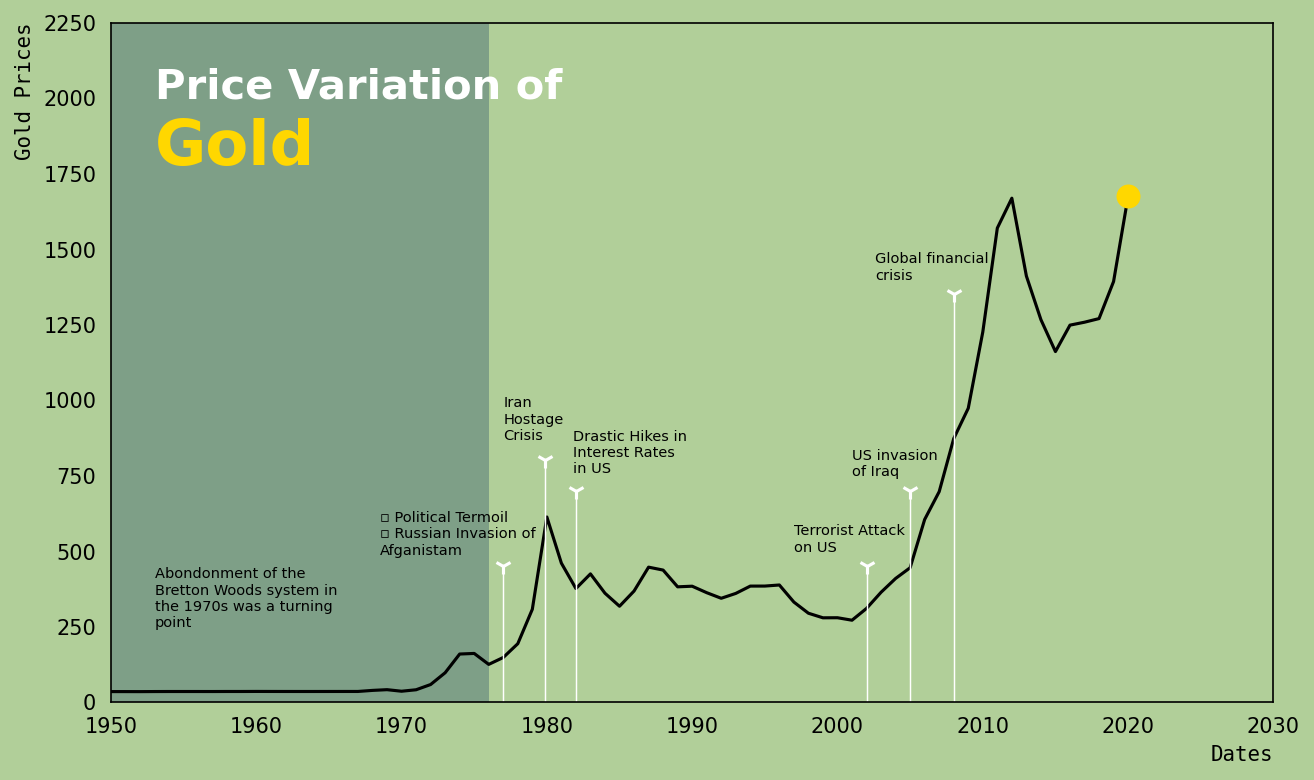

In [67]:
## Creating the Canvas
background_color = '#B1CF99'
fig = plt.figure(figsize=(10, 6), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

## Plotting the graph
sns.lineplot(x=df_GPrice_Yearwise.index, y='Price',data=df_GPrice_Yearwise,color='black', ax=ax0)

## Axis modification
ax0.set_ylim([0,2250])
ax0.set_xlim([1950,2030])
ax0.set_ylabel("Gold Prices",fontsize=10,loc='top', fontfamily='monospace')
ax0.set_xlabel("Dates",fontsize=10,loc='right', fontfamily='monospace')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)

## Goledn Dot at the end DataPoint
ax0.plot(df_GPrice_Yearwise.index.max(),df_GPrice_Yearwise['Price'].max(), 'o', markersize=10, fillstyle='full',color='gold', markeredgewidth=1.5)





## Price Variation of Gold
ax0.text(1953,2000, 'Price Variation of',color='white',fontsize=20, fontweight='bold')
ax0.text(1953,1780, 'Gold',color='gold',fontsize=30, fontweight='bold')

## Faded Portion
ax0.axvspan(1950, 1976, facecolor='#09305E',alpha=0.3)
## Bretteon Woods
ax0.text(1953,250,
'''
Abondonment of the
Bretton Woods system in
the 1970s was a turning
point''', fontsize=7)

#### Annotations ####
ax0.axvline(x=1977, ymin=0, ymax=0.2, color='white',linewidth=0.7)
ax0.plot(1977,450, "1", markersize=8, fillstyle='full',color='white', markeredgewidth=1.5)
ax0.text(1968.5,490,'▫ Political Termoil\n▫ Russian Invasion of\nAfganistam',ha='left',fontsize=7)

ax0.axvline(x=1979.9, ymin=0, ymax=0.35, color='white',linewidth=0.7)
ax0.plot(1979.9,800, "1", markersize=8, fillstyle='full',color='white', markeredgewidth=1.5)
ax0.text(1977,870,'Iran\nHostage\nCrisis',ha='left',fontsize=7)

ax0.axvline(x=1982, ymin=0, ymax=0.3, color='white',linewidth=0.7)
ax0.plot(1982,700, "1", markersize=8, fillstyle='full',color='white', markeredgewidth=1.5)
ax0.text(1981.8,760,'Drastic Hikes in\nInterest Rates\nin US',ha='left',fontsize=7)

ax0.axvline(x=2002, ymin=0, ymax=0.2, color='white',linewidth=0.7)
ax0.plot(2002,450, "1", markersize=8, fillstyle='full',color='white', markeredgewidth=1.5)
ax0.text(1997,500,'Terrorist Attack\non US',ha='left',fontsize=7)

ax0.axvline(x=2005, ymin=0, ymax=0.3, color='white',linewidth=0.7)
ax0.plot(2005,700, "1", markersize=8, fillstyle='full',color='white', markeredgewidth=1.5)
ax0.text(2001,750,'US invasion\nof Iraq', ha='left',fontsize=7)

ax0.axvline(x=2008, ymin=0, ymax=0.6, color='white',linewidth=0.7)
ax0.plot(2008,1350, "1", markersize=8, fillstyle='full',color='white', markeredgewidth=1.5)
ax0.text(2002.6,1400,'Global financial\ncrisis',ha='left',fontsize=7)

[back to top](#contents)

## Correlation

Correlations can be of two types<br>
 . Positive<br>
 . Negative<br>
 ie. if one parameter is decreasing with the increment of our target parameter then we would say that the parameter is negatively correlated with our target parameter. Similarly if a parameter is increasing with increment in our target parameter then it would represent a positive correlation.

In [16]:
correlation = df_raw.corr()

heatmap

<AxesSubplot:>

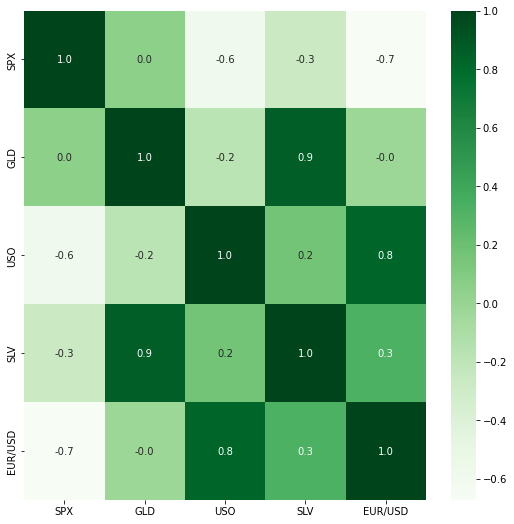

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar = True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Greens')

In [18]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Thus we can see that USO and the currency ratio have a negative correlation with our target parameter Gold Price.

<AxesSubplot:xlabel='GLD', ylabel='Count'>

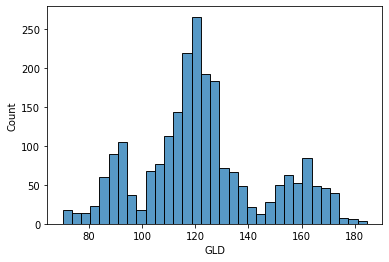

In [19]:
sns.histplot(df_raw['GLD'])

From this distribution, we can see most of the values lie around 120. The y axis column denotes the density ie, the number of alues.

[back to top](#contents)

# Prediction

We will train a Ranodom forest Regressor model to predict the gold price. To make feature data we will drop the Date and Gold column just. 

In [20]:
#splitting the feature sand targets
X = df_raw.drop(['Date','GLD'], axis=1)
Y = df_raw.GLD
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting into Training and Testing data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

[back to top](#contents)

### Using RandomForestRegressor

In [22]:
model = RandomForestRegressor(n_estimators = 100, random_state=2)
model.fit(X_train, Y_train)
#prediction
prediction = model.predict(X_test)

In [23]:
print(prediction)

[168.11379932  82.23519965 116.22490032 127.70480079 120.65890158
 154.78889721 149.69589755 126.12270048 117.41669876 126.11890066
 116.90020126 171.56690077 141.86319844 167.79489879 115.18020028
 117.81960059 139.20070298 170.28390114 159.17470285 158.59569966
 155.07480021 125.23220003 176.43619959 156.89410326 125.24900038
  93.86899998  76.93210017 120.74380005 119.12259955 167.61919981
  88.18580007 125.26050004  91.07990071 117.57250049 121.07749913
 136.55970098 115.53570086 115.39860083 148.97049957 107.18050102
 104.19980257  87.24959778 126.5021005  118.20639983 153.41749912
 119.73489967 108.46519982 108.01749814  92.99170026 127.27349752
  75.56760045 113.79569945 121.32939993 111.31929935 118.86579891
 120.89249961 158.77939994 168.49440108 147.09019666  85.77549852
  94.23570036  86.7967992   90.46990009 119.01700073 126.45980073
 127.62500019 170.14950032 122.25569933 117.49489887  98.44850012
 167.97310066 142.75829825 131.95160314 121.0854019  121.10159948
 119.84490

### Evaluation of the Model

to evaluate our model's performance, we import metrics from ScikitLearn. 

In [24]:
#evaluation
error_score = metrics.r2_score(Y_test, prediction)
print(error_score)

0.9884562581856317


Such a value for 'r squared error' is a pretty good value. This denotes that it's a great model to use for prediction.

[back to top](#contents)

### Building a DataFrame out of these two lists.
to plot and compare the actual Price and predicted price using plotly, it would be convenient to plot. 

In [25]:
comparison = pd.DataFrame(list(zip(Y_test,prediction)),
                        columns = ['Actual','Predicted'])
comparison.head()

,Actual,Predicted
0,168.020004,168.113799
1,81.230003,82.235200
2,112.320000,116.224900
3,127.589996,127.704801
4,119.620003,120.658902


In [26]:
comparison['Number_of_Values'] = comparison.index
comparison.head()

,Actual,Predicted,Number_of_Values
0,168.020004,168.113799,0
1,81.230003,82.235200,1
2,112.320000,116.224900,2
3,127.589996,127.704801,3
4,119.620003,120.658902,4


Now we are going to plot this DataFrame containing two columns named Actual and Predicted using plotly.

In [27]:
fig = px.line(comparison, x = 'Number_of_Values', y = ['Actual','Predicted'])

fig.update_layout(yaxis_title='Gold Price',
    title='Comparison between Actual and Predicted')

#fig.update_traces(name)
iplot(fig)
#animation_frame = 'Date', range_x =['1/2/2008','5/16/2018'], range_y = [50,200]

[back to top](#contents)

## CONCLUSION
As you saw in this project, we first train a machine learning model, then use the trained model for prediction. Similarly, few other models also can be made much more precise, by feeding a very large dataset, to get a very accurate score (but it will be pretty time-consuming).